# Bilag 6 - Delanalyse 2

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import bilag_7_d2_riskkit as d2

from datetime import datetime
%matplotlib inline

# Importering og filtrering af data

In [2]:
d2_data = pd.read_excel("Data/Data_d2_3101.xlsx",
                      header=0, index_col=0, parse_dates=True)

In [3]:
d2_data = d2_data['1999-01-04':'2020-12-31']
d2_data.head(1)

,USGG3M,FEDL01,SPX,UKX,DAX,NKY,NDUEEGF,LUATTRUU,LGT1TRUU,SPGSCITR
Dato,,,,,,,,,,
1999-01-04,4.472,5.04,1228.1,9747.46,6208.81,120.0527,88.327,982.38,331.7231,1992.325


In [4]:
d2_data.columns = ['RF', 'Lånerente', 'SP500', 'FTSE', 'DAX', 'Nikkei', 'MSCI EM', 'US Treasury', 'Global Treasury', 'Commodities']
d2_data.head(1)

,RF,Lånerente,SP500,FTSE,DAX,Nikkei,MSCI EM,US Treasury,Global Treasury,Commodities
Dato,,,,,,,,,,
1999-01-04,4.472,5.04,1228.1,9747.46,6208.81,120.0527,88.327,982.38,331.7231,1992.325


In [5]:
d2_aktiver = d2_data[['SP500', 'FTSE', 'DAX', 'Nikkei', 'MSCI EM', 'US Treasury', 'Global Treasury', 'Commodities']]

In [6]:
d2_afkast_ukor = d2_aktiver.pct_change().dropna()

In [7]:
d2_afkast_ukor.head(1)

,SP500,FTSE,DAX,Nikkei,MSCI EM,US Treasury,Global Treasury,Commodities
Dato,,,,,,,,
1999-01-05,0.013582,0.012485,-0.004358,-0.009931,0.009816,-0.002463,-0.001347,-0.008623


In [8]:
libor_data = pd.read_excel("Data/Libor renter.xlsx",
                      header=0, index_col=0, parse_dates=True)

In [9]:
libor_år = libor_data['1999-01-05':]/100
libor_daglig = (1+libor_år)**(1/252)-1

In [10]:
# Her korrigeres afkast for valutaeffekt
FTSE_kor = d2_afkast_ukor['FTSE']+libor_daglig['Libor USD']-libor_daglig['Libor GBP']
DAX_kor = d2_afkast_ukor['DAX']+libor_daglig['Libor USD']-libor_daglig['Libor EUR']
Nikkei_kor = d2_afkast_ukor['Nikkei']+libor_daglig['Libor USD']-libor_daglig['Libor JPY']

In [11]:
# Afkast, hvor udenlandske aktieindeks er korrigeret for valutaeffekt
d2_afkast = pd.DataFrame({'SP500': d2_afkast_ukor['SP500'], 'FTSE': FTSE_kor, 'DAX': DAX_kor, 'Nikkei': Nikkei_kor,\
                         'MSCI EM': d2_afkast_ukor['MSCI EM'], 'US Treasury': d2_afkast_ukor['US Treasury'],\
                         'Global Treasury': d2_afkast_ukor['Global Treasury'], 'Commodities': d2_afkast_ukor['Commodities']})
d2_afkast.head(1)

,SP500,FTSE,DAX,Nikkei,MSCI EM,US Treasury,Global Treasury,Commodities
Dato,,,,,,,,
1999-01-05,0.013582,0.012443,-0.004288,-0.009756,0.009816,-0.002463,-0.001347,-0.008623


In [12]:
# Antal aktiver
n_aktiver = d2_afkast.shape[1]

## Renter

In [13]:
rente_data = pd.read_excel("Data/Renter.xlsx",
                      header=0, index_col=0, parse_dates=True)

In [14]:
rente_data.head(1)

,USGG3M,Libor USD
Date,,
1973-01-02,5.22,5.705666


### Risikofri rente

In [15]:
rf_år = pd.DataFrame({'Risikofri Rente': rente_data['USGG3M']})
rf_år = rf_år['1999-01-04':'2020-12-31']/100

In [16]:
rf_daglig = (1+rf_år)**(1/252)-1

### Lånerente

In [17]:
r_lån_år = pd.DataFrame({'Lånerente': rente_data['Libor USD']})
r_lån_år = r_lån_år['1999-01-04':'2020-12-31']/100

In [18]:
r_lån_daglig = (1+r_lån_år)**(1/252)-1

# Aktivklasser

In [19]:
aktier_afkast = d2_afkast[['SP500', 'FTSE', 'DAX', 'Nikkei', 'MSCI EM']]
n_aktier = aktier_afkast.shape[1]

In [20]:
# Aktieportefølje
pf_aktie_aktiver = (1/n_aktier)*aktier_afkast['SP500']+(1/n_aktier)*aktier_afkast['FTSE']\
+(1/n_aktier)*aktier_afkast['DAX']+(1/n_aktier)*aktier_afkast['Nikkei']+(1/n_aktier)*aktier_afkast['MSCI EM']
afkast_pf_aktie = pd.DataFrame({'Aktie portefølje': pf_aktie_aktiver})
afkast_pf_aktie.head(1)

,Aktie portefølje
Dato,
1999-01-05,0.004359


In [21]:
obligationer_afkast = d2_afkast[['US Treasury', 'Global Treasury']]
n_obligationer = obligationer_afkast.shape[1]

In [22]:
# Obligationsportefølje
pf_obligation_aktiver = (1/n_obligationer)*obligationer_afkast['US Treasury']+(1/n_obligationer)*obligationer_afkast['Global Treasury']
afkast_pf_obl = pd.DataFrame({'Obligations portefølje': pf_obligation_aktiver})
afkast_pf_obl.head(1)

,Obligations portefølje
Dato,
1999-01-05,-0.001905


In [23]:
commodities = pd.DataFrame({'Commodities': d2_afkast['Commodities']})

# Rebalanceringsdage

In [24]:
rebalancering_data = pd.read_excel("Data/Rebalancering_månedlig_faktorer.xlsx",
                      header=0, index_col=0, parse_dates=True)

In [25]:
labels_rebal_aoc = ['Aktiefaktor', 'Rentefaktor', 'Inflationsfaktor']
labels_rebal_aocs = ['Aktiefaktor', 'Rentefaktor', 'Inflationsfaktor', 'Stylefaktor']
rebalancering_aoc = pd.DataFrame({'Rebalancering': rebalancering_data['Aktiefaktor']})
rebalancering_aocs = pd.DataFrame({'Rebalancering': rebalancering_data['Aktiefaktor']})
rebalancering_lv = rebalancering_data[labels_rebal_aoc]

# Analyse med Aktie-, Rente- og Inflationsfaktor (ARI)

In [26]:
aktier_obligationer_commodities = pd.DataFrame({'Aktie portefølje': afkast_pf_aktie['Aktie portefølje'], \
                            'Obligations portefølje': afkast_pf_obl['Obligations portefølje'], \
                            'Commodities': d2_afkast['Commodities']})

In [27]:
aoc_faktorer = aktier_obligationer_commodities.rename(columns={'Aktie portefølje':'Aktiefaktor', 'Obligations portefølje':'Rentefaktor', \
                            'Commodities':'Inflationsfaktor'
                            }, inplace=False)

### ARI: Ligevægtet portefølje, månedlig rebalancering

In [28]:
labels_ligevægtet = ['Aktiefaktor', 'Rentefaktor', 'Inflationsfaktor']
aktiver_ligevægtet = aoc_faktorer
n_aktiver_lv = aktiver_ligevægtet.shape[1]

In [29]:
optimale_vægte = 1/n_aktiver_lv
vægte_ligevægtet = pd.DataFrame().reindex_like(rebalancering_lv)
vægte_ligevægtet_m = rebalancering_lv.dropna()
vægte_ligevægtet_m[:].iloc[:,]=optimale_vægte
vægte_ligevægtet[labels_ligevægtet] = vægte_ligevægtet_m[labels_ligevægtet]

In [30]:
wi_ligevægtet = d2.rebalancering_aoc_pf(aktiver_ligevægtet, vægte_ligevægtet)

In [31]:
afkast_ligevægtet = wi_ligevægtet.pct_change().dropna()

In [32]:
afkast_ligevægtet = pd.DataFrame({'Afkast ligevægtet': afkast_ligevægtet['Wealth']})

In [33]:
d2.stats_d2(afkast_ligevægtet['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
Afkast ligevægtet,0.031007,0.111342,0.154523,-0.456332


### AOC: Minimum varians, med månedlig rebalancering

In [34]:
w_mv = d2.optimale_mv_vægte(rebalancering_aoc, aoc_faktorer)

In [35]:
mv_aktiver = aoc_faktorer['2000-01-04':]

In [36]:
wi_mv = d2.rebalancering_aoc_pf(mv_aktiver, w_mv, startværdi=100)

In [37]:
afkast_mv = wi_mv.pct_change().dropna()
afkast_mv = pd.DataFrame({'Afkast MV': afkast_mv['Wealth']})

In [38]:
d2.stats_d2(afkast_mv['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
Afkast MV,0.043449,0.049114,0.600246,-0.126928


### ARI: Tangent portefølje, med månedlig rebalancering

In [39]:
w_msr = d2.optimale_tangent_vægte(rebalancering_aoc, aoc_faktorer, rf_daglig['1999-01-05':])

In [40]:
wi_tangent = d2.rebalancering_aoc_pf(mv_aktiver['2000-01-04':], w_msr, startværdi=100)

In [41]:
afkast_tangent = wi_tangent.pct_change().dropna()
afkast_tangent = pd.DataFrame({'Afkast tangent': afkast_tangent['Wealth']})

In [42]:
d2.stats_d2(afkast_tangent['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
Afkast tangent,0.044845,0.091933,0.335678,-0.284122


### ARI: Naiv Risk Parity

In [43]:
std_aoc = aktier_obligationer_commodities.rolling(252).std()[252:]
std_invers_aoc = (1/std_aoc)
invers_aoc = pd.DataFrame({'AOC: Invers': std_invers_aoc.sum(axis=1)})
vægte_naiv_rp_aoc = std_invers_aoc.divide(invers_aoc['AOC: Invers'], axis=0)

In [44]:
cov_akt_obl_com = aktier_obligationer_commodities.rolling(252).cov()['2000-01-04':]

In [45]:
risikobidrag_naiv_rp_aoc = d2.r_bidrag_aoc(vægte_naiv_rp_aoc, cov_akt_obl_com)

In [46]:
# Her laves en DataFrame med vægte til månedlig rebalancering
rebal_vægte_naiv_rp_aoc = d2.opt_vægte_til_rebalancering(rebalancering_aoc['2000-01-04':], vægte_naiv_rp_aoc)

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [47]:
wi_naiv_rp_ug_aoc = d2.rebalancering_aoc_pf(aktier_obligationer_commodities['2000-01-04':], rebal_vægte_naiv_rp_aoc)

In [48]:
afkast_naiv_rp_ug_aoc = wi_naiv_rp_ug_aoc.pct_change().dropna()
afkast_naiv_rp_ug_aoc = pd.DataFrame({'AOC: Naiv RP Ugearet': afkast_naiv_rp_ug_aoc['Wealth']})

In [49]:
d2.stats_d2(afkast_naiv_rp_ug_aoc['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
AOC: Naiv RP Ugearet,0.042173,0.063998,0.440987,-0.256513


## ARI: Gearet naiv RP

$$ w_{a} * R_{p} + (1 - w_{a}) * r_{borrowing} $$

In [50]:
std_rp_rul_aoc = afkast_naiv_rp_ug_aoc.rolling(252).std().dropna()

In [51]:
ønsket_vol_daglig = 0.1/(252**0.5)

In [52]:
# Her findes gearingsfaktor, og vægt i lånerente
gearings_faktor_aoc = ønsket_vol_daglig/std_rp_rul_aoc
gearings_faktor_aoc.rename(columns={'AOC: Naiv RP Ugearet': 'Gearingsfaktor'}, inplace=True)
gearings_faktor_aoc['Vægt lånerente']=1 - gearings_faktor_aoc

In [53]:
gearing_naiv_rp_aoc = d2.gearing(rebalancering_aoc['2001-01-03':], gearings_faktor_aoc)

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [54]:
rebalancerings_dage = rebalancering_aoc
rebalancerings_dage.iloc[0] = 'Rebalancering'

In [55]:
# Her samles det vægtede, gearede afkast
afkast_naiv_rp_g_aoc = gearing_naiv_rp_aoc['Gearingsfaktor']*afkast_naiv_rp_ug_aoc['AOC: Naiv RP Ugearet']['2001-01-03':]\
+ gearing_naiv_rp_aoc['Vægt lånerente']*r_lån_daglig['Lånerente']['2001-01-03':]
afkast_naiv_rp_g_aoc = pd.DataFrame({'AOC: Naiv RP Gearet': afkast_naiv_rp_g_aoc})

In [56]:
d2.stats_d2(afkast_naiv_rp_g_aoc['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
AOC: Naiv RP Gearet,0.043734,0.108451,0.274436,-0.396578


### ARI: Constant Proportion Portfolio Insurance (CPPI) - Ligevægtet som risikabelt aktiv 

In [57]:
risky_asset_lv = afkast_ligevægtet['2001-01-03':]
safe_asset = rf_daglig['2001-01-03':]

In [58]:
cppi_pf_lv = d2.cppi(rebalancering_aoc['2001-01-03':], risky_asset_lv, safe_asset['Risikofri Rente'], m=5, floor=0.8)

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:729: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


(0.0, 213.75998084680666)

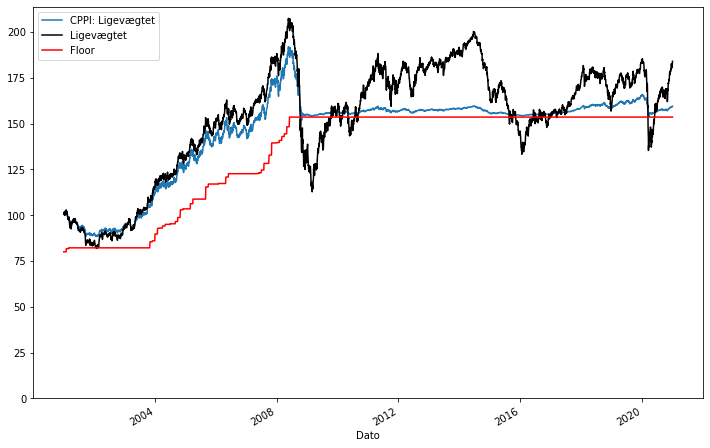

In [59]:
# Plottes længere nede - slet evt her
wi_cppi_lv = cppi_pf_lv['Wealth'].rename(columns= { 'Afkast ligevægtet' : 'CPPI: Ligevægtet'})
risikabelt_aktiv_lv = cppi_pf_lv['Risky Wealth'].rename(columns= { 'Afkast ligevægtet' : 'Ligevægtet'})
floor_lv = cppi_pf_lv['floor_history'].rename(columns= { 'Afkast ligevægtet' : 'Floor'})

ax = wi_cppi_lv.plot(figsize=(12,8), legend = True)
risikabelt_aktiv_lv.plot(ax=ax, style = "k-", legend = True)
floor_lv.plot(ax=ax, style = "r-", legend = True)
ax.set_ylim(bottom=0)

In [60]:
afkast_cppi_lv = wi_cppi_lv.pct_change().dropna()

In [61]:
#vægte
vægte_cppi = cppi_pf_lv['Risky Allocation'].rename(columns= { 'Afkast ligevægtet' : 'Vægt risikabelt aktiv'})
vægte_cppi['Vægt risikofrit aktiv'] = 1-vægte_cppi['Vægt risikabelt aktiv']
#vægte_cppi.to_excel('cppi_vægte.xlsx')

# Risk parity

## ARI Risk Parity med lige risikobidrag (ERC)

In [62]:
# Kovarians matrice med 1 års rullende vindue - til estimation af vægte og validering af risikobidrag
cov_aoc_rul = aktier_obligationer_commodities.rolling(252).cov()
cov_aoc_rul.index.names = ['Date', 'Aktiv']
cov_matrice_aoc = cov_aoc_rul.dropna()

In [63]:
vægte_rp_ug_aoc = d2.optimale_rp_vægte_aoc(cov_matrice_aoc)

/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:899: RuntimeWarning: divide by zero encountered in log
  res = 0.5 * np.dot(np.dot(x, cov_matrix), x) - sum(risk_budget * np.log(beta * x))
/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [64]:
# Her laves en DataFrame med vægte til månedlig rebalancering
rebal_vægte_rp_ug_aoc = d2.opt_vægte_til_rebalancering(rebalancering_aoc['2000-01-03':], vægte_rp_ug_aoc)

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [65]:
wi_rp_ug_aoc = d2.rebalancering_aoc_pf(aktier_obligationer_commodities['2000-01-03':], rebal_vægte_rp_ug_aoc)

In [66]:
afkast_rp_ug_aoc = wi_rp_ug_aoc.pct_change().dropna()
afkast_rp_ug_aoc = pd.DataFrame({'AOC: RP Ugearet': afkast_rp_ug_aoc['Wealth']})

In [67]:
d2.stats_d2(afkast_rp_ug_aoc['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
AOC: RP Ugearet,0.043119,0.059969,0.486179,-0.221577


In [68]:
# validering af risikobidrag
risiko_bidrag_rp_aoc = d2.r_bidrag_aoc(vægte_rp_ug_aoc, cov_matrice_aoc)

## Gearet AOC ERC Risk Parity

$$ w_{a} * R_{p} + (1 - w_{a}) * r_{borrowing} $$

In [69]:
std_rp_rul_aoc = afkast_rp_ug_aoc.rolling(252).std().dropna()

In [70]:
ønsket_vol_daglig = 0.1/(252**0.5)

In [71]:
# Her findes gearingsfaktor, og vægt i lånerente
gearings_faktor_aoc = ønsket_vol_daglig/std_rp_rul_aoc
gearings_faktor_aoc.rename(columns={'AOC: RP Ugearet': 'Gearingsfaktor'}, inplace=True)
gearings_faktor_aoc['Vægt lånerente']=1 - gearings_faktor_aoc

In [72]:
gearing_rp_aoc = d2.gearing(rebalancering_aoc['2001-01-03':], gearings_faktor_aoc['2001-01-03':])

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [73]:
# Her samles det vægtede, gearede afkast
afkast_rp_g_aoc = gearing_rp_aoc['Gearingsfaktor']*afkast_rp_ug_aoc['AOC: RP Ugearet']['2001-01-03':]\
+ gearing_rp_aoc['Vægt lånerente']*r_lån_daglig['Lånerente']['2001-01-03':]
afkast_rp_g_aoc = pd.DataFrame({'AOC: RP Gearet': afkast_rp_g_aoc})

### Sammenligning af ARI Risk Parity med og uden korrelationseffekter

In [74]:
ug_rp_test = pd.DataFrame({'Naiv': afkast_naiv_rp_ug_aoc['AOC: Naiv RP Ugearet'], 'RP': afkast_rp_ug_aoc['AOC: RP Ugearet']})

In [75]:
wi_rp_aoc_test = 100*(1+ug_rp_test).cumprod()

## RP ARI med 40%/40%/20% risikobidrag

In [76]:
vægte_rp_ug_aoc_404020 = d2.optimale_rp_vægte_aoc_404020(cov_matrice_aoc)

/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:899: RuntimeWarning: divide by zero encountered in log
  res = 0.5 * np.dot(np.dot(x, cov_matrix), x) - sum(risk_budget * np.log(beta * x))
/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [77]:
risiko_bidrag_rp_aoc = d2.r_bidrag_aoc(vægte_rp_ug_aoc_404020, cov_matrice_aoc)

In [78]:
# Her laves en DataFrame med vægte til månedlig rebalancering
rebal_vægte_rp_ug_aoc_404020 = d2.opt_vægte_til_rebalancering(rebalancering_aoc['2000-01-03':], vægte_rp_ug_aoc_404020)

/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [79]:
wi_rp_ug_aoc_404020 = d2.rebalancering_aoc_pf(aktier_obligationer_commodities['2000-01-03':], rebal_vægte_rp_ug_aoc_404020)

In [80]:
afkast_rp_ug_aoc_404020 = wi_rp_ug_aoc_404020.pct_change().dropna()
afkast_rp_ug_aoc_404020 = pd.DataFrame({'AOC 40/40/20: RP Ugearet': afkast_rp_ug_aoc_404020['Wealth']})

In [81]:
d2.stats_d2(afkast_rp_ug_aoc_404020['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
AOC 40/40/20: RP Ugearet,0.046311,0.057314,0.563655,-0.199596


In [82]:
ug_rp_test_aoc = pd.DataFrame({'RP 40/40/20': afkast_rp_ug_aoc_404020['AOC 40/40/20: RP Ugearet'], 'RP': afkast_rp_ug_aoc['AOC: RP Ugearet']})

In [83]:
wi_ug_rp_test_aoc = 100*(1+ug_rp_test_aoc).cumprod()
#wi_ug_rp_test_aoc.plot()

## Gearing af RP ARI 40/40/20

$$ w_{a} * R_{p} + (1 - w_{a}) * r_{borrowing} $$

In [84]:
std_rp_rul_aoc_404020 = afkast_rp_ug_aoc_404020.rolling(252).std().dropna()

In [85]:
ønsket_vol_daglig = 0.1/(252**0.5)

In [86]:
# Her findes gearingsfaktor, og vægt i lånerente
gearings_faktor_aoc_404020 = ønsket_vol_daglig/std_rp_rul_aoc_404020
gearings_faktor_aoc_404020.rename(columns={'AOC 40/40/20: RP Ugearet': 'Gearingsfaktor'}, inplace=True)
gearings_faktor_aoc_404020['Vægt lånerente']=1 - gearings_faktor_aoc_404020

In [87]:
gearing_rp_aoc_404020 = d2.gearing(rebalancering_aoc['2001-01-02':], gearings_faktor_aoc_404020)

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [88]:
# Her samles det vægtede, gearede afkast
afkast_rp_g_aoc_404020 = gearing_rp_aoc_404020['Gearingsfaktor']*afkast_rp_ug_aoc_404020['AOC 40/40/20: RP Ugearet']['2001-01-02':]\
+ gearing_rp_aoc_404020['Vægt lånerente']*r_lån_daglig['Lånerente']['2001-01-02':]
afkast_rp_g_aoc_404020 = pd.DataFrame({'AOC 40/40/20: RP Gearet': afkast_rp_g_aoc_404020})

# RP udvidelse med style faktorer ARIS

In [89]:
style_afkast = pd.read_excel("Data/Style.xlsx",
                      header=0, index_col=0, parse_dates=True)

In [90]:
# Styleportefølje
n_style = style_afkast.shape[1]
pf_style_aktiver = (1/n_style)*style_afkast['SMB']+(1/n_style)*style_afkast['HML']\
+(1/n_style)*style_afkast['MOM']+(1/n_style)*style_afkast['BAB']

afkast_pf_style = pd.DataFrame({'Style portefølje': pf_style_aktiver})

In [91]:
aktier_obligationer_commodities_style = pd.DataFrame({'Aktie portefølje': afkast_pf_aktie['Aktie portefølje'], \
                            'Obligations portefølje': afkast_pf_obl['Obligations portefølje'], \
                            'Commodities': d2_afkast['Commodities'], 'Style': afkast_pf_style['1999-01-05':]['Style portefølje']})

<AxesSubplot:xlabel='Dato'>

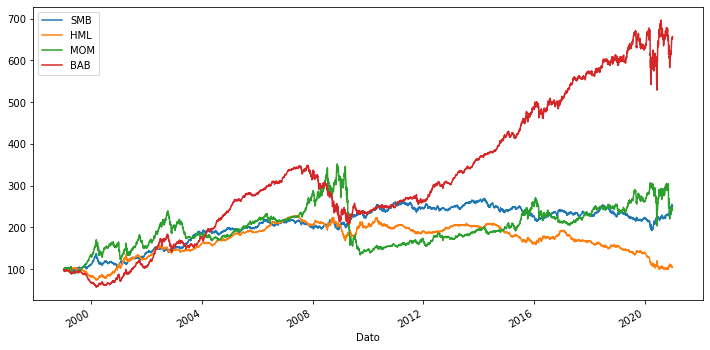

In [92]:
wi_style = 100*(1+style_afkast).cumprod()
wi_style.plot(figsize=(12,6))

In [93]:
afkast_aktiver_aocs = aktier_obligationer_commodities_style

In [94]:
# Kovarians matrice med 1 års rullende vindue - til estimation af vægte og validering af risikobidrag
cov_aocs_rul = aktier_obligationer_commodities_style.rolling(252).cov()
cov_aocs_rul.index.names = ['Date', 'Aktiv']
cov_matrice_aocs = cov_aocs_rul.dropna()

In [95]:
vægte_rp_ug_aocs_35351515 = d2.optimale_rp_vægte_aocs_35351515(cov_matrice_aocs)

/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:899: RuntimeWarning: divide by zero encountered in log
  res = 0.5 * np.dot(np.dot(x, cov_matrix), x) - sum(risk_budget * np.log(beta * x))
/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [96]:
risiko_bidrag_rp_aocs_35351515 = d2.r_bidrag_aocs(vægte_rp_ug_aocs_35351515, cov_matrice_aocs)

In [97]:
# Her laves en DataFrame med vægte til månedlig rebalancering
rebal_vægte_rp_ug_aocs_35351515 = d2.opt_vægte_til_rebalancering(rebalancering_aoc['2000-01-03':]
 , vægte_rp_ug_aocs_35351515)

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:634: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [98]:
wi_rp_ug_aocs_35351515 = d2.rebalancering_aocs_pf(aktier_obligationer_commodities_style['2000-01-03':], rebal_vægte_rp_ug_aocs_35351515)

In [99]:
afkast_rp_ug_aocs_35351515 = wi_rp_ug_aocs_35351515.pct_change().dropna()
afkast_rp_ug_aocs_35351515 = pd.DataFrame({'AOCS 35/35/15/15: RP Ugearet': afkast_rp_ug_aocs_35351515['Wealth']})

In [100]:
d2.stats_d2(afkast_rp_ug_aocs_35351515['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
AOCS 35/35/15/15: RP Ugearet,0.041633,0.046215,0.599152,-0.247789


## Gearing af RP ARIS 35/35/15/15

$$ w_{a} * R_{p} + (1 - w_{a}) * r_{borrowing} $$

In [101]:
std_rp_rul_aocs_35351515 = afkast_rp_ug_aocs_35351515.rolling(252).std().dropna()

In [102]:
ønsket_vol_daglig = 0.1/(252**0.5)

In [103]:
# Her findes gearingsfaktor, og vægt i lånerente
gearings_faktor_aocs_35351515 = ønsket_vol_daglig/std_rp_rul_aocs_35351515
gearings_faktor_aocs_35351515.rename(columns={'AOCS 35/35/15/15: RP Ugearet': 'Gearingsfaktor'}, inplace=True)
gearings_faktor_aocs_35351515['Vægt lånerente']=1 - gearings_faktor_aocs_35351515

In [104]:
gearing_rp_aocs_35351515 = d2.gearing(rebalancering_aoc['2001-01-03':], gearings_faktor_aocs_35351515['2001-01-03':])

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [105]:
# Her samles det vægtede, gearede afkast
afkast_rp_g_aocs_35351515 = gearing_rp_aocs_35351515['Gearingsfaktor']*afkast_rp_ug_aocs_35351515['AOCS 35/35/15/15: RP Ugearet']['2001-01-03':]\
+ gearing_rp_aocs_35351515['Vægt lånerente']*r_lån_daglig['Lånerente']['2001-01-03':]
afkast_rp_g_aocs_35351515 = pd.DataFrame({'AOCS 35/35/15/15: RP Gearet': afkast_rp_g_aocs_35351515})

### Sammenligning af ARI og ARIS RP porteføljer

### Ugearede RP porteføljer

In [106]:
ug_rp_test_aocs = pd.DataFrame({'RP 35/35/15/15': afkast_rp_ug_aocs_35351515['AOCS 35/35/15/15: RP Ugearet'], \
                                'RP 40/40/20': afkast_rp_ug_aoc_404020['AOC 40/40/20: RP Ugearet'], \
                                'RP': afkast_rp_ug_aoc['AOC: RP Ugearet']})

In [107]:
wi_ug_rp_test_aocs = 100*(1+ug_rp_test_aocs).cumprod()

### Gearede RP porteføljer

In [108]:
g_rp_aocs = pd.DataFrame({'RP 35/35/15/15 gearet': afkast_rp_g_aocs_35351515['AOCS 35/35/15/15: RP Gearet'], \
                                'RP 40/40/20 gearet': afkast_rp_g_aoc_404020['AOC 40/40/20: RP Gearet'], \
                                'RP ERC': afkast_rp_g_aoc['AOC: RP Gearet']})

In [109]:
wi_g_rp_aocs = 100*(1+g_rp_aocs).cumprod()

## Udvikling i standardafvigelse for RP ugearet samt korrelationer mellem aktier og obligationer over tid

In [110]:
labels = ['SP500', 'US Treasury']
aktiver = d2_afkast[labels]
corr = aktiver.rolling(252).corr().dropna()
korrelation_akt_obl = d2_afkast['SP500'].rolling(5).corr(d2_afkast['US Treasury']).dropna()

In [111]:
aktier = aktier_afkast.mean(axis=1)
obligationer = obligationer_afkast.mean(axis=1)
korrelation_akt_obl = aktier.rolling(5).corr(obligationer)

# Wealth index og statistik

### Stats for RP

In [112]:
afkast_pf_rp = pd.DataFrame({'ARI: Naiv Risk Parity Ugearet': afkast_naiv_rp_ug_aoc['AOC: Naiv RP Ugearet'], \
                             'ARI: Naiv Risk Parity Gearet': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], \
                             'ARI: ERC Risk Parity Ugearet': afkast_rp_ug_aoc['AOC: RP Ugearet'], \
                             'ARI: ERC Risk Parity Gearet': afkast_rp_g_aoc['AOC: RP Gearet'], \
                             'ARI: Risk Parity 40/40/20 Ugearet': afkast_rp_ug_aoc_404020['AOC 40/40/20: RP Ugearet'], \
                             'ARI: Risk Parity 40/40/20 Gearet': afkast_rp_g_aoc_404020['AOC 40/40/20: RP Gearet'], \
                             'ARIS: Risk Parity 35/35/15/15 Ugearet': afkast_rp_ug_aocs_35351515['AOCS 35/35/15/15: RP Ugearet'], \
                             'ARIS: Risk Parity 35/35/15/15 Gearet': afkast_rp_g_aocs_35351515['AOCS 35/35/15/15: RP Gearet'] \
                             })
afkast_pf_rp = afkast_pf_rp['2001-01-03':'2020-12-31']

In [113]:
d2.stats_d2(afkast_pf_rp['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
ARI: Naiv Risk Parity Ugearet,0.042173,0.063998,0.440987,-0.256513
ARI: Naiv Risk Parity Gearet,0.043734,0.108451,0.274436,-0.396578
ARI: ERC Risk Parity Ugearet,0.043119,0.059969,0.486179,-0.221577
ARI: ERC Risk Parity Gearet,0.048741,0.107589,0.322555,-0.371808
ARI: Risk Parity 40/40/20 Ugearet,0.046311,0.057314,0.563655,-0.199596
ARI: Risk Parity 40/40/20 Gearet,0.055841,0.108418,0.384702,-0.341349
ARIS: Risk Parity 35/35/15/15 Ugearet,0.041633,0.046215,0.599152,-0.247789
ARIS: Risk Parity 35/35/15/15 Gearet,0.067463,0.112998,0.470588,-0.406364


In [114]:
wi_pf_rp = 100*(1+afkast_pf_rp)[:'2020-12-31'].cumprod()

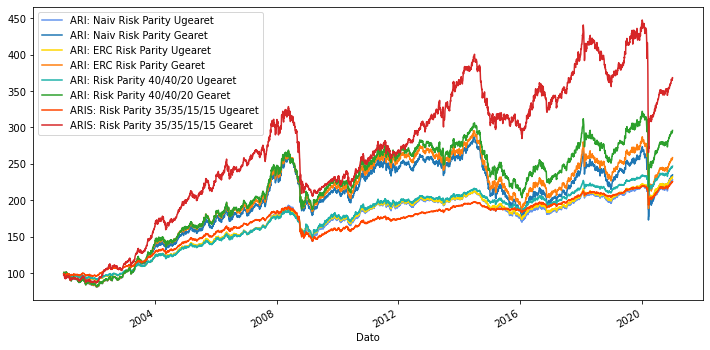

In [115]:
wi_pf_rp['ARI: Naiv Risk Parity Ugearet'].plot(figsize=(12,6), legend=True, color='cornflowerblue')

ax1 = wi_pf_rp['ARI: Naiv Risk Parity Gearet'].plot(figsize=(12,6), legend=True, color='tab:blue')
ax2 = wi_pf_rp['ARI: ERC Risk Parity Ugearet'].plot(figsize=(12,6), legend=True, color='gold')
ax3 = wi_pf_rp['ARI: ERC Risk Parity Gearet'].plot(figsize=(12,6), legend=True, color='tab:orange')
ax4 = wi_pf_rp['ARI: Risk Parity 40/40/20 Ugearet'].plot(figsize=(12,6), legend=True, color='lightseagreen')
ax5 = wi_pf_rp['ARI: Risk Parity 40/40/20 Gearet'].plot(figsize=(12,6), legend=True, color='tab:green')
ax6 = wi_pf_rp['ARIS: Risk Parity 35/35/15/15 Ugearet'].plot(figsize=(12,6), legend=True, color='orangered')
ax7 = wi_pf_rp['ARIS: Risk Parity 35/35/15/15 Gearet'].plot(figsize=(12,6), legend=True, color='tab:red')



# Plot af grafer og tabeller

### Udvikling i faktorer

In [116]:
aoc_faktorer = aktier_obligationer_commodities.rename(columns={'Aktie portefølje':'Aktiefaktor', 'Obligations portefølje':'Rentefaktor', \
                            'Commodities':'Inflationsfaktor'
                            }, inplace=False)

#### Stats og plot for 1999-2020

<AxesSubplot:title={'center':'Udvikling i faktorporteføljer 1999-2020'}, xlabel='Dato'>

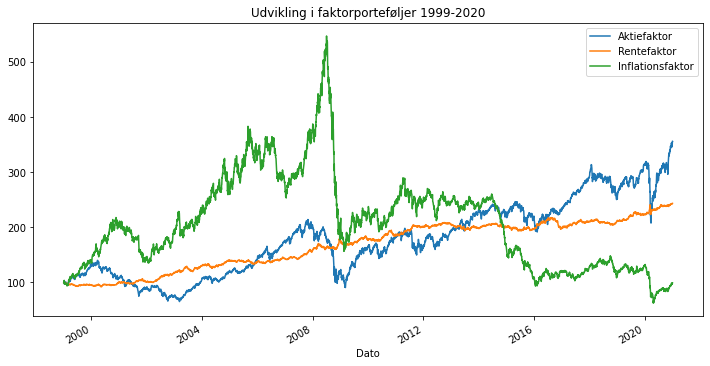

In [117]:
wi_aoc_99 = 100*(1+aoc_faktorer['1999-01-04':'2020-12-31']).cumprod()
wi_aoc_99.plot(figsize=(12,6), title='Udvikling i faktorporteføljer 1999-2020')

In [118]:
d2.stats_d2(aoc_faktorer['1999-01-04':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-02':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
Aktiefaktor,0.059520,0.164634,0.259810,-0.575938
Rentefaktor,0.041338,0.052411,0.546590,-0.095762
Inflationsfaktor,-0.000353,0.233175,-0.192814,-0.885370


In [119]:
aoc_kor_99 = aoc_faktorer.corr()
aoc_kor_99

,Aktiefaktor,Rentefaktor,Inflationsfaktor
Aktiefaktor,1.000000,-0.056706,0.355859
Rentefaktor,-0.056706,1.000000,-0.022233
Inflationsfaktor,0.355859,-0.022233,1.000000


### Stats for benchmark porteføljer og naiv RP

In [120]:
sammenligning_aoc = pd.DataFrame({'Ligevægtet': afkast_ligevægtet['Afkast ligevægtet'], \
                          'Minimum-varians': afkast_mv['Afkast MV'], \
                          'Tangentportefølje': afkast_tangent['Afkast tangent'], \
                          'CPPI: Ligevægtet': afkast_cppi_lv['CPPI: Ligevægtet'], \
                          'ARI: Naiv Risk Parity': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], 
                         })
sammenligning_aoc = sammenligning_aoc['2001-01-03':'2020-12-31']

In [121]:
wi_pf_aoc = 100*(1+sammenligning_aoc['2001-01-03':'2020-12-31']).cumprod()

<AxesSubplot:title={'center':'Udvikling i Benchmark porteføljer og naiv gearet Risk Parity 2001-2020'}, xlabel='Dato'>

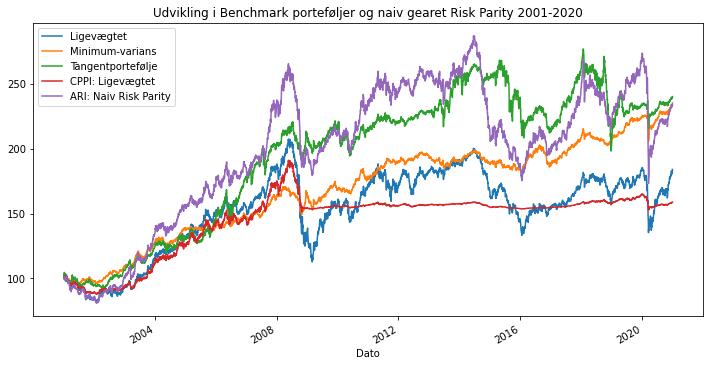

In [122]:
wi_pf_aoc.plot(figsize=(12,6), title='Udvikling i Benchmark porteføljer og naiv gearet Risk Parity 2001-2020')

In [123]:
#Stats for samlet periode
d2.stats_d2(sammenligning_aoc['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
Ligevægtet,0.031007,0.111342,0.154523,-0.456332
Minimum-varians,0.043449,0.049114,0.600246,-0.126928
Tangentportefølje,0.044845,0.091933,0.335678,-0.284122
CPPI: Ligevægtet,0.023422,0.053590,0.181616,-0.208318
ARI: Naiv Risk Parity,0.043734,0.108451,0.274436,-0.396578


In [124]:
d2.var_gaussian(sammenligning_aoc['2001-01-03':'2020-12-31'],level=1, modified=True)

Ligevægtet               0.027784
Minimum-varians          0.011312
Tangentportefølje        0.023190
CPPI: Ligevægtet         0.013091
ARI: Naiv Risk Parity    0.041767
dtype: float64

In [125]:
d2.skewness(sammenligning_aoc['2001-01-03':'2020-12-31'])

Ligevægtet              -0.539455
Minimum-varians         -0.261016
Tangentportefølje       -0.638304
CPPI: Ligevægtet        -0.067940
ARI: Naiv Risk Parity   -1.189787
dtype: float64

In [126]:
d2.kurtosis(sammenligning_aoc['2001-01-03':'2020-12-31'])

Ligevægtet                8.855802
Minimum-varians           8.218357
Tangentportefølje         8.967977
CPPI: Ligevægtet          9.555894
ARI: Naiv Risk Parity    17.859999
dtype: float64

## Risikobidrag og Herfindahl index

#### ARI

In [127]:
aoc_cov = aoc_faktorer.rolling(252).cov()['2001-01-03':]

##### Naiv Risk Parity ARI

In [128]:
risiko_bidrag_naiv_rp_aoc = d2.r_bidrag_aoc(vægte_naiv_rp_aoc['2001-01-03':], aoc_cov)

In [129]:
risiko_bidrag_naiv_rp_aoc.mean()

RB akt.    0.356491
RB obl.    0.270046
RB com.    0.373463
dtype: float64

In [130]:
HRC_naiv_rp_aoc = 0.373463

In [131]:
HI_naiv_rp_aoc = (risiko_bidrag_naiv_rp_aoc**2).sum(axis=1)
HI_naiv_rp_aoc.mean()

0.346603419005142

##### Ligevægtet ARI

In [132]:
vægt_ligevægtet = pd.DataFrame().reindex_like(aoc_faktorer)
vægt_ligevægtet[:] = 1 / n_aktiver_lv

In [133]:
risiko_bidrag_lv_aoc = d2.r_bidrag_aoc(vægt_ligevægtet['2001-01-03':], aoc_cov)

In [134]:
risiko_bidrag_lv_aoc.mean()

RB akt.    0.335698
RB obl.    0.028393
RB com.    0.635908
dtype: float64

In [135]:
HRC_lv_aoc = 0.635908

In [136]:
HI_lv_aoc = (risiko_bidrag_lv_aoc**2).sum(axis=1)
HI_lv_aoc.mean()

0.5344301136594106

##### MV ARI

In [137]:
vægte_mv = w_mv.fillna(method='ffill')

In [138]:
risiko_bidrag_mv_aoc = d2.r_bidrag_aoc(vægte_mv['2001-01-03':], aoc_cov)

In [139]:
risiko_bidrag_mv_aoc.mean()

RB akt.    0.107950
RB obl.    0.859504
RB com.    0.032546
dtype: float64

In [140]:
HRC_mv_aoc = 0.860173

In [141]:
HI_mv_aoc = (risiko_bidrag_mv_aoc**2).sum(axis=1)
HI_mv_aoc.mean()

0.7635181602018406

##### Tangent ARI

In [142]:
vægte_tangent = w_msr.fillna(method='ffill')

In [143]:
risiko_bidrag_tangent_aoc = d2.r_bidrag_aoc(vægte_tangent['2001-01-03':], aoc_cov)

In [144]:
risiko_bidrag_tangent_aoc.mean()

RB akt.    0.431282
RB obl.    0.415732
RB com.    0.152986
dtype: float64

In [145]:
HRC_tangent_aoc = 0.428744

In [146]:
HI_tangent_aoc = (risiko_bidrag_tangent_aoc**2).sum(axis=1)
HI_tangent_aoc.mean()

0.8034808972370086

### Vægte i Minimum Varians og Tangent portefølje

In [147]:
# Gennemsnitlige MV vægte over perioden
w_mv.dropna().mean(axis=0)

Aktiefaktor         0.106549
Rentefaktor         0.859657
Inflationsfaktor    0.033795
dtype: float64

In [148]:
# Gennemsnitlige tangent vægte over perioden
w_msr.dropna().mean(axis=0)

Aktiefaktor         0.373062
Rentefaktor         0.490025
Inflationsfaktor    0.136912
dtype: float64

### CPPI

In [149]:
wi_cppi_lv = cppi_pf_lv['Wealth'].rename(columns= { 'Afkast ligevægtet' : 'CPPI: Ligevægtet'})
risikabelt_aktiv_lv = cppi_pf_lv['Risky Wealth'].rename(columns= { 'Afkast ligevægtet' : 'Ligevægtet'})
floor_lv = cppi_pf_lv['floor_history'].rename(columns= { 'Afkast ligevægtet' : 'Floor'})

### Performance under Finanskrisen og Covid-19 for BM og naiv RP

In [150]:
finanskrise = sammenligning_aoc['2007-10-09':'2009-03-09']
covid_19 = sammenligning_aoc['2020-02-19':'2020-03-23']

In [151]:
ak_finanskrise = (1+finanskrise).prod()-1
ak_covid_19 = (1+covid_19).prod()-1

In [152]:
tabel = pd.DataFrame({ 'Finanskrise': ak_finanskrise, 'Covid-19': ak_covid_19})
tabel

,Finanskrise,Covid-19
Ligevægtet,-0.347140,-0.231901
Minimum-varians,-0.021263,-0.077749
Tangentportefølje,0.005359,-0.066622
CPPI: Ligevægtet,-0.061881,-0.060426
ARI: Naiv Risk Parity,-0.153158,-0.321641


### Korrelationer

In [153]:
akt_rente_kor = aoc_faktorer['Aktiefaktor'].rolling(252).corr(aoc_faktorer['Rentefaktor']).dropna()
akt_inf_kor = aoc_faktorer['Aktiefaktor'].rolling(252).corr(aoc_faktorer['Inflationsfaktor']).dropna()
inf_rente_kor = aoc_faktorer['Inflationsfaktor'].rolling(252).corr(aoc_faktorer['Rentefaktor']).dropna()

<AxesSubplot:title={'center':'Udvikling i korrelationer mellem aktie-, rente- og inflationsfaktor 1999-2020'}, xlabel='Dato'>

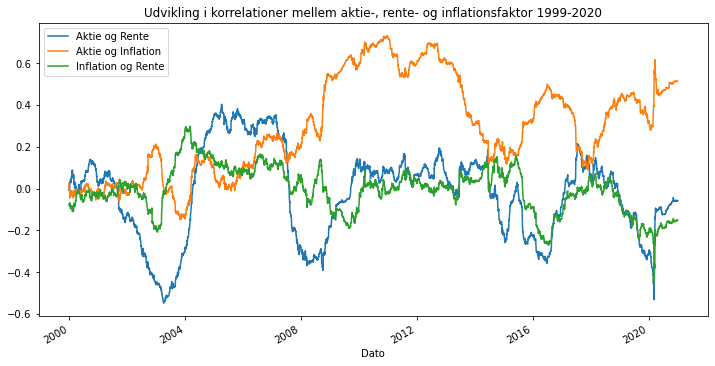

In [154]:
korr_aoc = pd.DataFrame({'Aktie og Rente': akt_rente_kor, \
                                  'Aktie og Inflation': akt_inf_kor, \
                                  'Inflation og Rente': inf_rente_kor})
korr_aoc.plot(figsize=(12,6), title='Udvikling i korrelationer mellem aktie-, rente- og inflationsfaktor 1999-2020')

### Risk Parity

In [155]:
sammenligning_rp_naiv_erc = pd.DataFrame({'AOC: Naiv RP Gearet': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], \
                             'AOC: ERC': afkast_rp_g_aoc['AOC: RP Gearet']})
sammenligning_rp_naiv_erc = sammenligning_rp_naiv_erc['2001-01-03':'2020-12-31']

### Udvidelse med style

In [156]:
aocs_faktorer = aktier_obligationer_commodities_style.rename(columns={'Aktie portefølje':'Aktiefaktor', 'Obligations portefølje':'Rentefaktor', \
                            'Commodities':'Inflationsfaktor', 'Style': 'Stylefaktor'
                            }, inplace=False)

In [157]:
wi_aocs = 100*(1+aocs_faktorer['1999-01-05':'2020-12-31']).cumprod()

<AxesSubplot:title={'center':'Udvikling i faktorporteføljer 1999-2020'}, xlabel='Dato'>

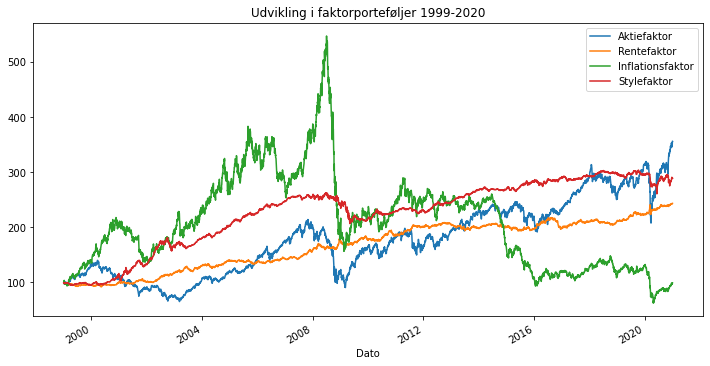

In [158]:
wi_aocs.plot(figsize=(12,6), title='Udvikling i faktorporteføljer 1999-2020')

In [159]:
# Stats for samlet periode
d2.stats_d2(aocs_faktorer['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
Aktiefaktor,0.061884,0.166909,0.285598,-0.575938
Rentefaktor,0.045102,0.052885,0.588294,-0.095762
Inflationsfaktor,-0.034954,0.235896,-0.202952,-0.885370
Stylefaktor,0.046651,0.064296,0.507678,-0.212390


In [160]:
aocs_kor = aocs_faktorer.corr()
aocs_kor

,Aktiefaktor,Rentefaktor,Inflationsfaktor,Stylefaktor
Aktiefaktor,1.000000,-0.056706,0.355859,-0.245669
Rentefaktor,-0.056706,1.000000,-0.022233,0.159331
Inflationsfaktor,0.355859,-0.022233,1.000000,-0.033177
Stylefaktor,-0.245669,0.159331,-0.033177,1.000000


In [161]:
style_aktie_kor = aocs_faktorer['Aktiefaktor'].rolling(252).corr(aocs_faktorer['Stylefaktor']).dropna()
style_rente_kor = aocs_faktorer['Rentefaktor'].rolling(252).corr(aocs_faktorer['Stylefaktor']).dropna()
style_inf_kor = aocs_faktorer['Inflationsfaktor'].rolling(252).corr(aocs_faktorer['Stylefaktor']).dropna()

<AxesSubplot:title={'center':'Udvikling i korrelationer mellem stylefaktor og hhv. Akti-, rente- og inflationsfaktor 1999-2020'}, xlabel='Dato'>

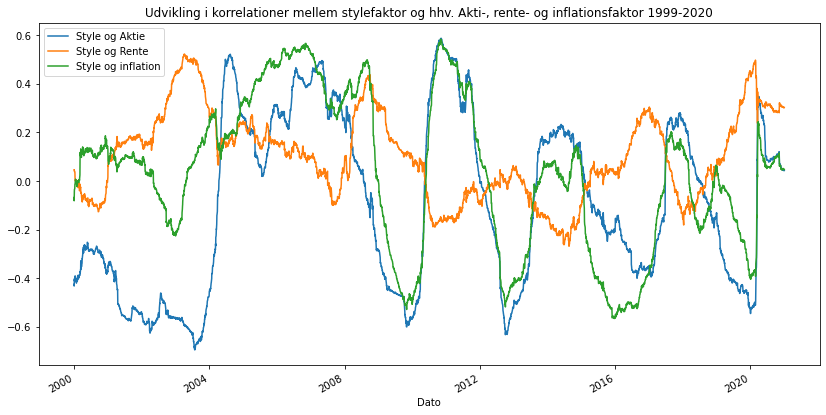

In [162]:
korr_aocs = pd.DataFrame({'Style og Aktie': style_aktie_kor, \
                          'Style og Rente': style_rente_kor, \
                          'Style og inflation': style_inf_kor})
korr_aocs.plot(figsize=(14,7), title='Udvikling i korrelationer mellem stylefaktor og hhv. Akti-, rente- og inflationsfaktor 1999-2020')

## Udvidelse - Gearing af RP AOCS 35/35/15/15 - med EWMA

$$ w_{a} * R_{p} + (1 - w_{a}) * r_{borrowing} $$

In [163]:
def ewma(afkast, lambda_constant=0.94):
    datoer = afkast.index
    n_steps = len(datoer)
    std_ewma = pd.DataFrame().reindex_like(afkast)
    for step in range(n_steps):
        if step == 0:
            var = (afkast.iloc[step])**2
            std = var**0.5
            
        else: 
            var = lambda_constant*(std_ewma.iloc[step-1])**2+(1-lambda_constant)*(afkast.iloc[step-1])**2
            std = var**0.5
        std_ewma.iloc[step] = std
    return std_ewma    

In [164]:
std_ewma_rp = ewma(afkast_rp_ug_aocs_35351515, lambda_constant=0.94)

In [165]:
ønsket_vol_daglig = 0.1/(252**0.5)

In [166]:
# Her findes gearingsfaktor, og vægt i lånerente
gearings_faktor_aocs_35351515_ewma = ønsket_vol_daglig/std_ewma_rp
gearings_faktor_aocs_35351515_ewma.rename(columns={'AOCS 35/35/15/15: RP Ugearet': 'Gearingsfaktor'}, inplace=True)
gearings_faktor_aocs_35351515_ewma['Vægt lånerente']=1 - gearings_faktor_aocs_35351515_ewma

In [167]:
gearing_rp_aocs_35351515_ewma = d2.gearing(rebalancering_aocs['2001-01-03':], gearings_faktor_aocs_35351515_ewma['2001-01-03':])

/Users/SusanneKrebs/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/Users/SusanneKrebs/Dropbox/FIR - Susanne og Rebecca/Specialet/Python/Delanalyse 2/bilag_7_d2_riskkit.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rebalancerings_dage.iloc[0,0:]= 'Rebalancering'


In [168]:
gearings_faktor_aocs_35351515_ewma.mean()

Gearingsfaktor    2.90962
Vægt lånerente   -1.90962
dtype: float64

In [169]:
# Her samles det vægtede, gearede afkast
afkast_rp_g_aocs_35351515_ewma = gearing_rp_aocs_35351515_ewma['Gearingsfaktor']*afkast_rp_ug_aocs_35351515['AOCS 35/35/15/15: RP Ugearet']['2001-01-03':]\
+ gearing_rp_aocs_35351515_ewma['Vægt lånerente']*r_lån_daglig['Lånerente']['2001-01-03':]
afkast_rp_g_aocs_35351515_ewma = pd.DataFrame({'AOCS 35/35/15/15: RP Gearet - EWMA': afkast_rp_g_aocs_35351515_ewma})

In [170]:
wi_rp_ewma = 100*(1+afkast_rp_g_aocs_35351515_ewma).cumprod()

### AOCS Risk Parity - Stats og sammenligning med de andre gearede Risk Parity porteføljer

In [171]:
# Her samles alle RP strategier i en DataFrame
sammenligning_rp = pd.DataFrame({'ARI: Naiv Risk Parity': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], \
                             'ARI: ERC Risk Parity': afkast_rp_g_aoc['AOC: RP Gearet'], \
                             'ARI: Risk Parity 40/40/20': afkast_rp_g_aoc_404020['AOC 40/40/20: RP Gearet'], \
                             'ARIS: Risk Parity 35/35/15/15': afkast_rp_g_aocs_35351515['AOCS 35/35/15/15: RP Gearet'], \
                             'ARIS: Risk Parity 35/35/15/15 - EWMA gearing': afkast_rp_g_aocs_35351515_ewma['AOCS 35/35/15/15: RP Gearet - EWMA'] \
                             })
sammenligning_rp = sammenligning_rp['2001-01-03':'2020-12-31']

In [172]:
wi_sammenligning_rp = 100*(1+sammenligning_rp['2001-01-03':'2020-12-31']).cumprod()

<AxesSubplot:title={'center':'Udvikling i RP strategier 2001-2020'}, xlabel='Dato'>

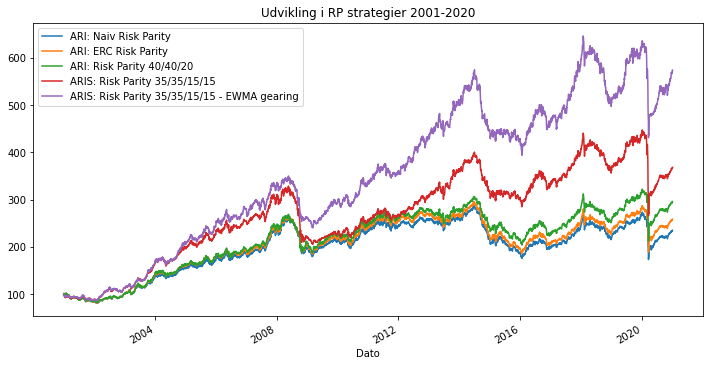

In [173]:
wi_sammenligning_rp.plot(figsize=(12,6), title='Udvikling i RP strategier 2001-2020')

In [174]:
# Stats for samlet periode
d2.stats_d2(sammenligning_rp['2001-01-3':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
ARI: Naiv Risk Parity,0.043734,0.108451,0.274436,-0.396578
ARI: ERC Risk Parity,0.048741,0.107589,0.322555,-0.371808
ARI: Risk Parity 40/40/20,0.055841,0.108418,0.384702,-0.341349
ARIS: Risk Parity 35/35/15/15,0.067463,0.112998,0.470588,-0.406364
ARIS: Risk Parity 35/35/15/15 - EWMA gearing,0.091459,0.109944,0.699003,-0.333127


In [175]:
d2.var_gaussian(sammenligning_rp['2001-01-03':'2020-12-31'],level=1, modified=True)

ARI: Naiv Risk Parity                           0.041767
ARI: ERC Risk Parity                            0.041277
ARI: Risk Parity 40/40/20                       0.046201
ARIS: Risk Parity 35/35/15/15                   0.065794
ARIS: Risk Parity 35/35/15/15 - EWMA gearing    0.029747
dtype: float64

In [176]:
d2.skewness(sammenligning_rp['2001-01-03':'2020-12-31'])

ARI: Naiv Risk Parity                          -1.189787
ARI: ERC Risk Parity                           -1.160531
ARI: Risk Parity 40/40/20                      -1.242571
ARIS: Risk Parity 35/35/15/15                  -1.979867
ARIS: Risk Parity 35/35/15/15 - EWMA gearing   -0.789785
dtype: float64

In [177]:
d2.kurtosis(sammenligning_rp['2001-01-03':'2020-12-31'])

ARI: Naiv Risk Parity                           17.859999
ARI: ERC Risk Parity                            17.754476
ARI: Risk Parity 40/40/20                       20.714267
ARIS: Risk Parity 35/35/15/15                   32.843133
ARIS: Risk Parity 35/35/15/15 - EWMA gearing    10.172417
dtype: float64

#### Akkumuleret afkast i kriser for RP

In [178]:
finanskrise_samlet_rp = sammenligning_rp['2007-10-09':'2009-03-09']
covid_19_samlet_rp = sammenligning_rp['2020-02-19':'2020-03-23']

In [179]:
ak_finanskrise_rp = (1+finanskrise_samlet_rp).prod()-1
ak_covid_19_rp = (1+covid_19_samlet_rp).prod()-1

In [180]:
tabel_rp = pd.DataFrame({ 'Finanskrise': ak_finanskrise_rp, 'Covid-19': ak_covid_19_rp})
tabel_rp

,Finanskrise,Covid-19
ARI: Naiv Risk Parity,-0.153158,-0.321641
ARI: ERC Risk Parity,-0.150999,-0.296678
ARI: Risk Parity 40/40/20,-0.162168,-0.302552
ARIS: Risk Parity 35/35/15/15,-0.270742,-0.374343
ARIS: Risk Parity 35/35/15/15 - EWMA gearing,-0.220779,-0.293843


### Udvikling i RP vægte, RB og HI over tid

In [181]:
vægte_rp_aoc_naiv = rebal_vægte_naiv_rp_aoc.fillna(method='ffill')

In [182]:
vægte_rp_erc = rebal_vægte_rp_ug_aoc.fillna(method='ffill')

In [183]:
vægte_rp_aoc_404020 = rebal_vægte_rp_ug_aoc_404020.fillna(method='ffill')

In [184]:
vægte_rp_aocs_35351515 = rebal_vægte_rp_ug_aocs_35351515.fillna(method='ffill')

#### Risikobidrag og HI AOC ERC

In [185]:
risiko_bidrag_rp_erc_aoc = d2.r_bidrag_aoc(vægte_rp_erc['2001-01-03':], aoc_cov)
risiko_bidrag_rp_erc_aoc.mean()

RB akt.    0.333692
RB obl.    0.332859
RB com.    0.333449
dtype: float64

In [186]:
HI_rp_erc_aoc = (risiko_bidrag_rp_erc_aoc**2).sum(axis=1)
HI_rp_erc_aoc.mean()

0.3342049918208957

#### Risikobidrag og HI AOC 40/40/20

In [187]:
risiko_bidrag_rp_aoc_404020 = d2.r_bidrag_aoc(vægte_rp_aoc_404020['2001-01-03':], aoc_cov)
risiko_bidrag_rp_aoc_404020.mean()

RB akt.    0.402984
RB obl.    0.393968
RB com.    0.203048
dtype: float64

In [188]:
HI_rp_aoc_404020 = (risiko_bidrag_rp_aoc_404020**2).sum(axis=1)
HI_rp_aoc_404020.mean()

0.36166931171497785

#### Risikobidrag og HI AOCS 35/35/15/15

In [189]:
risiko_bidrag_rp_aocs_35351515 = d2.r_bidrag_aocs(vægte_rp_aocs_35351515['2001-01-03':], cov_matrice_aocs)
risiko_bidrag_rp_aocs_35351515.mean()

RB akt.     0.353331
RB obl.     0.340531
RB com.     0.157741
RB style    0.148397
dtype: float64

In [190]:
HI_rp_aocs_35351515 = (risiko_bidrag_rp_aocs_35351515**2).sum(axis=1)
HI_rp_aocs_35351515.mean()

0.33757715615800404

## Udvikling i Sharpe Ratio

### Sharpe Ratio for BM og Naiv Risk Parity

In [191]:
mer_afk_bm = sammenligning_aoc.subtract(rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'], axis=0)

In [192]:
std_aoc_bm = sammenligning_aoc.rolling(252).std()[252:]

In [193]:
sharpe_ratio_bm = mer_afk_bm['2002-01-09':].divide(std_aoc_bm['2002-01-09':])

### Sharpe Ratio for Risk Parity porteføljer

In [194]:
mer_afk_rp = sammenligning_rp.subtract(rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'], axis=0)

In [195]:
std_aoc_rp = sammenligning_rp.rolling(252).std()[252:]

In [196]:
sharpe_ratio_rp = mer_afk_rp['2002-01-09':].divide(std_aoc_rp['2002-01-09':])

### AOCS MV og tangent

#### Minimum varian AOCS

In [197]:
w_mv_aocs = d2.optimale_mv_vægte(rebalancering_aocs, aocs_faktorer)

In [198]:
mv_aktiver_aocs = aocs_faktorer['2000-01-04':]

In [199]:
wi_mv_aocs = d2.rebalancering_aocs_pf(mv_aktiver_aocs, w_mv_aocs, startværdi=100)

In [200]:
afkast_mv_aocs = wi_mv_aocs.pct_change().dropna()
afkast_mv_aocs = pd.DataFrame({'AOCS: MV': afkast_mv_aocs['Wealth']})

In [201]:
d2.stats_d2(afkast_mv_aocs['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
AOCS: MV,0.041626,0.037874,0.730906,-0.112131


#### Tangent portefølje AOCS

In [202]:
w_msr_aocs = d2.optimale_tangent_vægte(rebalancering_aocs, aocs_faktorer, rf_daglig['1999-01-05':])

In [203]:
wi_tangent_aocs = d2.rebalancering_aocs_pf(mv_aktiver_aocs['2000-01-04':], w_msr_aocs, startværdi=100)

In [204]:
afkast_tangent_aocs = wi_tangent_aocs.pct_change().dropna()
afkast_tangent_aocs = pd.DataFrame({'AOCS: Tangent': afkast_tangent_aocs['Wealth']})

In [205]:
d2.stats_d2(afkast_tangent_aocs['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-03':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
AOCS: Tangent,0.055502,0.069986,0.591184,-0.232765


### Sammenligning af alle porteføljer (AOCS MV og Tangent vs AOCS RP 35/35/15/15 med og uden EWMA)

In [206]:
sammenligning_aocs = pd.DataFrame({'ARIS: Minimum-varians': afkast_mv_aocs['AOCS: MV'], \
                          'ARIS: Tangentportefølje': afkast_tangent_aocs['AOCS: Tangent'], \
                          'ARIS: Risk Parity 35/35/15/15': afkast_rp_g_aocs_35351515['AOCS 35/35/15/15: RP Gearet'], \
                          'ARIS: Risk Parity 35/35/15/15 - EWMA gearing': afkast_rp_g_aocs_35351515_ewma['AOCS 35/35/15/15: RP Gearet - EWMA']         
                         })
sammenligning_aocs = sammenligning_aocs['2001-01-03':'2020-12-31']

In [207]:
wi_pf_aocs = 100*(1+sammenligning_aocs['2001-01-03':'2020-12-31']).cumprod()

<AxesSubplot:title={'center':'Udvikling i AOCS MV, Tangent og RP 35/35/15/15 2001-2020'}, xlabel='Dato'>

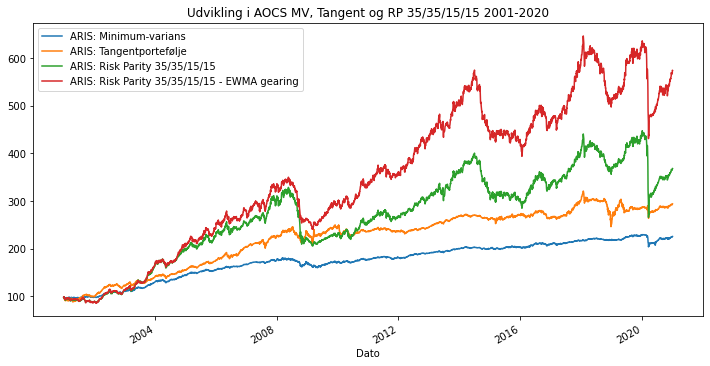

In [208]:
wi_pf_aocs.plot(figsize=(12,6), title='Udvikling i AOCS MV, Tangent og RP 35/35/15/15 2001-2020')

In [209]:
d2.stats_d2(sammenligning_aocs['2001-01-03':'2020-12-31'], rf_daglig['Risikofri Rente']['2001-01-02':'2020-12-31'])

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
ARIS: Minimum-varians,0.041626,0.037874,0.730759,-0.112131
ARIS: Tangentportefølje,0.055502,0.069986,0.591064,-0.232765
ARIS: Risk Parity 35/35/15/15,0.067463,0.112998,0.470492,-0.406364
ARIS: Risk Parity 35/35/15/15 - EWMA gearing,0.091459,0.109944,0.698859,-0.333127


#### Akkumuleret afkast i kriser for RP

In [210]:
finanskrise_samlet_aocs = sammenligning_aocs['2007-10-09':'2009-03-09']
covid_19_samlet_aocs = sammenligning_aocs['2020-02-19':'2020-03-23']
ak_finanskrise_aocs = (1+finanskrise_samlet_aocs).prod()-1
ak_covid_19_aocs = (1+covid_19_samlet_aocs).prod()-1

In [211]:
tabel_rp = pd.DataFrame({ 'Finanskrise': ak_finanskrise_aocs, 'Covid-19': ak_covid_19_aocs})
tabel_rp

,Finanskrise,Covid-19
ARIS: Minimum-varians,-0.065504,-0.104312
ARIS: Tangentportefølje,0.000545,-0.066616
ARIS: Risk Parity 35/35/15/15,-0.270742,-0.374343
ARIS: Risk Parity 35/35/15/15 - EWMA gearing,-0.220779,-0.293843


#### Risikobidrag og HI AOCS MV

In [212]:
vægte_mv = w_mv_aocs.fillna(method='ffill')

In [213]:
risiko_bidrag_rp_aocs_mv = d2.r_bidrag_aocs(vægte_mv['2001-01-03':], cov_matrice_aocs['2001-01-03':])
risiko_bidrag_rp_aocs_mv.mean()

RB akt.     0.063877
RB obl.     0.380453
RB com.     0.018181
RB style    0.537489
dtype: float64

In [214]:
HI_rp_aocs_mv = (risiko_bidrag_rp_aocs_mv**2).sum(axis=1)
HI_rp_aocs_mv.mean()

0.49773407390505614

#### Risikobidrag og HI AOCS Tangent

In [215]:
vægte_tangent_aocs = w_msr_aocs.fillna(method='ffill')

In [216]:
risiko_bidrag_rp_aocs_tangent = d2.r_bidrag_aocs(vægte_tangent_aocs['2001-01-03':], cov_matrice_aocs['2001-01-03':])
risiko_bidrag_rp_aocs_tangent.mean()

RB akt.     0.235418
RB obl.     0.299203
RB com.     0.098560
RB style    0.366819
dtype: float64

In [217]:
HI_rp_aocs_tangent = (risiko_bidrag_rp_aocs_tangent**2).sum(axis=1)
HI_rp_aocs_tangent.mean()

0.7199957980024028

In [218]:
d2.skewness(sammenligning_aocs['2001-01-03':])

ARIS: Minimum-varians                          -0.932715
ARIS: Tangentportefølje                        -0.532981
ARIS: Risk Parity 35/35/15/15                  -1.979867
ARIS: Risk Parity 35/35/15/15 - EWMA gearing   -0.789785
dtype: float64

In [219]:
d2.kurtosis(sammenligning_aocs['2001-01-03':])

ARIS: Minimum-varians                           15.230689
ARIS: Tangentportefølje                         19.003164
ARIS: Risk Parity 35/35/15/15                   32.843133
ARIS: Risk Parity 35/35/15/15 - EWMA gearing    10.172417
dtype: float64

## Udvikling i Drawdown

In [220]:
def drawdown(return_series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    wealth_index = 100*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        #"Wealth": wealth_index,
        #"Peaks": previous_peaks,
        "Drawdown": drawdowns
    })

In [221]:
def dd(afkast):
    wealth_index = 100*(1+afkast).cumprod()
    previous_peak = wealth_index.cummax()
    drawdown = (wealth_index-previous_peak)/previous_peak
    return drawdown

In [222]:
dd_aoc=dd(sammenligning_aoc)

<AxesSubplot:title={'center':'Udvikling i Drawdown for Benchmarkstrategier 2001-2020'}, xlabel='Dato'>

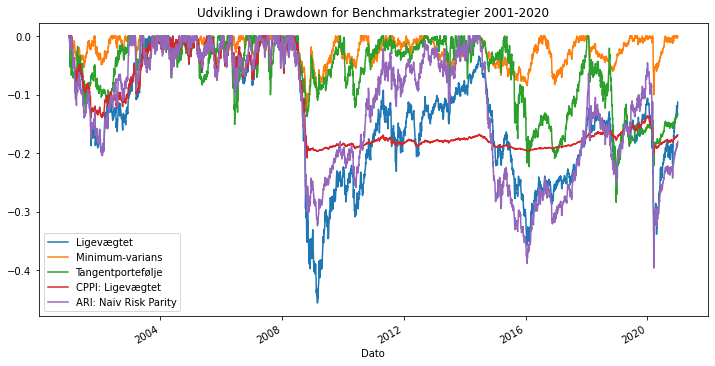

In [223]:
dd_aoc.plot(figsize=(12,6), title='Udvikling i Drawdown for Benchmarkstrategier 2001-2020')

In [224]:
dd_rp=dd(sammenligning_rp)

<AxesSubplot:title={'center':'Udvikling i Drawdown for Risk Parity strategier 2001-2020'}, xlabel='Dato'>

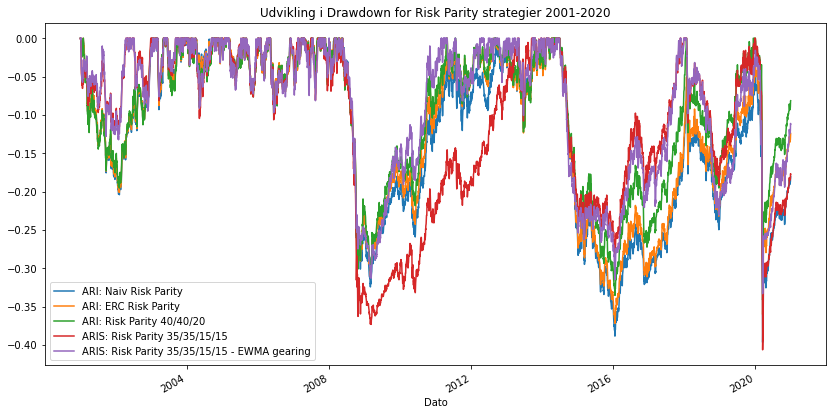

In [225]:
dd_rp.plot(figsize=(14,7), title='Udvikling i Drawdown for Risk Parity strategier 2001-2020')

<AxesSubplot:xlabel='Dato'>

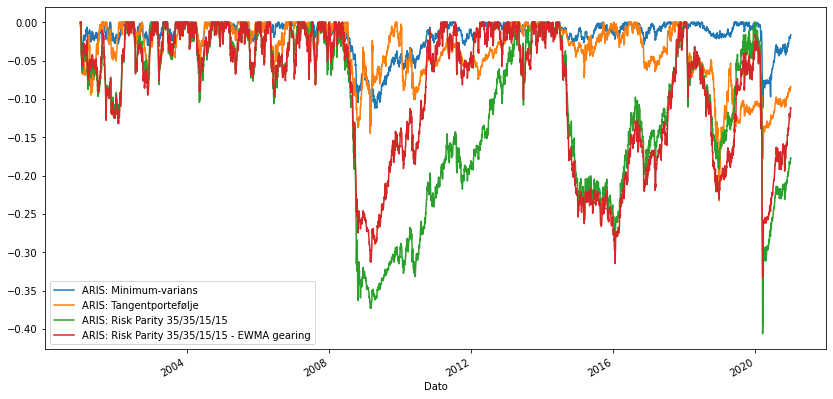

In [226]:
dd_aocs=dd(sammenligning_aocs)
dd_aocs.plot(figsize=(14,7))

## Gearing, volatilitet og korrelationer

In [227]:
gearing_naiv_rp_aoc.mean(), gearing_rp_aoc.mean(), gearing_rp_aoc_404020.mean(), gearing_rp_aocs_35351515.mean()

(Gearingsfaktor    1.731399
 Vægt lånerente   -0.731399
 dtype: float64,
 Gearingsfaktor    1.816395
 Vægt lånerente   -0.816395
 dtype: float64,
 Gearingsfaktor    1.911944
 Vægt lånerente   -0.911944
 dtype: float64,
 Gearingsfaktor    2.706799
 Vægt lånerente   -1.706799
 dtype: float64)

In [228]:
ugearede_rp = afkast_pf_rp[['ARI: Naiv Risk Parity Ugearet', 'ARI: ERC Risk Parity Ugearet', 'ARI: Risk Parity 40/40/20 Ugearet', 'ARIS: Risk Parity 35/35/15/15 Ugearet']]

<AxesSubplot:title={'center':'Udvikling i volatilitet for ugearede Risk Parity strategier 2001-2020'}, xlabel='Dato'>

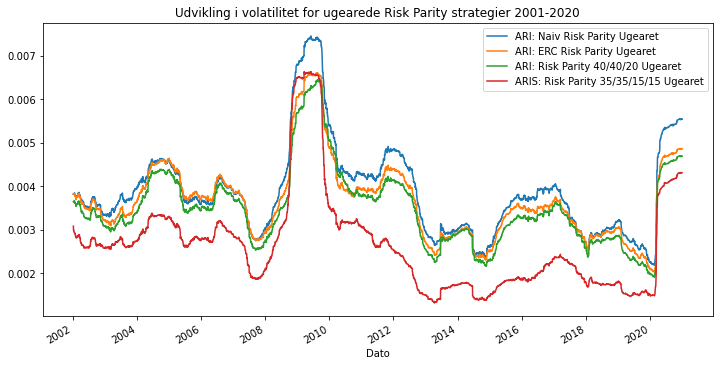

In [229]:
ugearede_rp.rolling(252).std().dropna().plot(figsize=(12,6), title='Udvikling i volatilitet for ugearede Risk Parity strategier 2001-2020')

In [230]:
akt_rente_kor_5 = aoc_faktorer['Aktiefaktor'].rolling(5).corr(aoc_faktorer['Rentefaktor']).dropna()
akt_inf_kor_5 = aoc_faktorer['Aktiefaktor'].rolling(5).corr(aoc_faktorer['Inflationsfaktor']).dropna()
inf_rente_kor_5 = aoc_faktorer['Inflationsfaktor'].rolling(5).corr(aoc_faktorer['Rentefaktor']).dropna()
style_aktie_kor_5 = aocs_faktorer['Aktiefaktor'].rolling(5).corr(aocs_faktorer['Stylefaktor']).dropna()
style_rente_kor_5 = aocs_faktorer['Rentefaktor'].rolling(5).corr(aocs_faktorer['Stylefaktor']).dropna()
style_inf_kor_5 = aocs_faktorer['Inflationsfaktor'].rolling(5).corr(aocs_faktorer['Stylefaktor']).dropna()

<AxesSubplot:title={'center':'Udvikling i 5 dages korrelationer mellem stylefaktor og hhv. Akti-, rente- og inflationsfaktor 1999-2020'}, xlabel='Dato'>

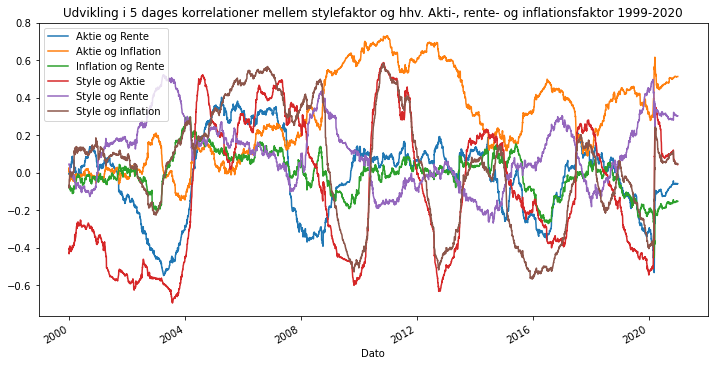

In [231]:
korr_aocs_5_dage = pd.DataFrame({'Aktie og Rente': akt_rente_kor, \
                                 'Aktie og Inflation': akt_inf_kor, \
                                 'Inflation og Rente': inf_rente_kor, \
                                 'Style og Aktie': style_aktie_kor, \
                                 'Style og Rente': style_rente_kor, \
                                 'Style og inflation': style_inf_kor})
korr_aocs_5_dage.plot(figsize=(12,6), title='Udvikling i 5 dages korrelationer mellem stylefaktor og hhv. Akti-, rente- og inflationsfaktor 1999-2020')

In [232]:
wi_rp_sammenligning = 100*(1+sammenligning_rp).cumprod()

### Plot af ARI Naiv RP og ERC RP

In [233]:
# Her samles alle RP strategier i en DataFrame
sammenligning_naiv_erc = pd.DataFrame({'ARI: Naiv Risk Parity': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], \
                             'ARI: ERC Risk Parity': afkast_rp_g_aoc['AOC: RP Gearet']})
sammenligning_naiv_erc = sammenligning_naiv_erc['2001-01-03':'2020-12-31']

In [234]:
wi_sammenligning_naiv_erc = 100*(1+sammenligning_naiv_erc['2001-01-03':'2020-12-31']).cumprod()

<AxesSubplot:title={'center':'Udvikling i naiv og ERC Risk Parity porteføljer 2001-2020'}, xlabel='Dato'>

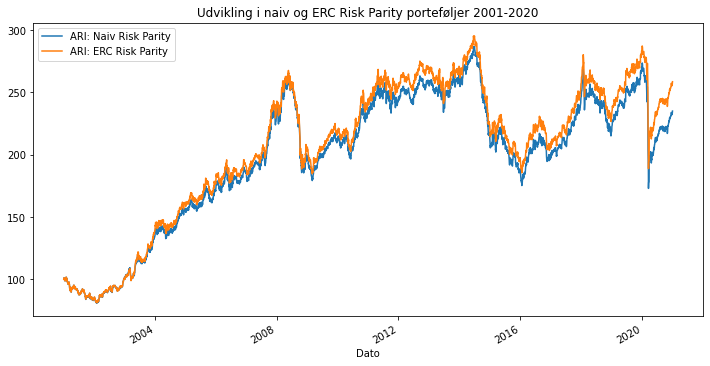

In [235]:
wi_sammenligning_naiv_erc.plot(figsize=(12,6), title='Udvikling i naiv og ERC Risk Parity porteføljer 2001-2020')

### Plot af ARI Naiv, ERC og 40/40/20 RP

In [236]:
# Her samles alle RP strategier i en DataFrame
sammenligning_naiv_erc_404020 = pd.DataFrame({'ARI: Naiv Risk Parity': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], \
                             'ARI: ERC Risk Parity': afkast_rp_g_aoc['AOC: RP Gearet'], \
                             'ARI: Risk Parity 40/40/20': afkast_rp_g_aoc_404020['AOC 40/40/20: RP Gearet']})
sammenligning_naiv_erc_404020 = sammenligning_naiv_erc_404020['2001-01-03':'2020-12-31']

In [237]:
wi_sammenligning_naiv_erc_404020 = 100*(1+sammenligning_naiv_erc_404020['2001-01-03':'2020-12-31']).cumprod()

<AxesSubplot:title={'center':'Udvikling i nai, ERC samt 40/40/20 Risk Parity porteføljer 2001-2020'}, xlabel='Dato'>

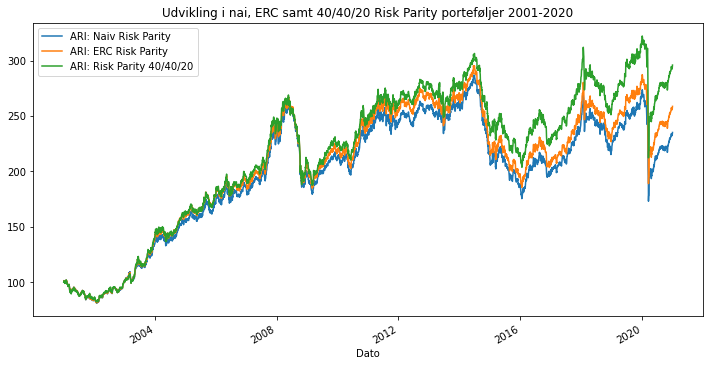

In [238]:
wi_sammenligning_naiv_erc_404020.plot(figsize=(12,6), title='Udvikling i nai, ERC samt 40/40/20 Risk Parity porteføljer 2001-2020')

### Plot af ARI Naiv, ERC, 40/40/20 og 35/35/15/15 RP

In [239]:
# Her samles alle RP strategier i en DataFrame
sammenligning_naiv_erc_35351515 = pd.DataFrame({'ARI: Naiv Risk Parity': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], \
                             'ARI: ERC Risk Parity': afkast_rp_g_aoc['AOC: RP Gearet'], \
                             'ARI: Risk Parity 40/40/20': afkast_rp_g_aoc_404020['AOC 40/40/20: RP Gearet'], \
                             'ARIS: Risk Parity 35/35/15/15': afkast_rp_g_aocs_35351515['AOCS 35/35/15/15: RP Gearet']})
sammenligning_naiv_erc_35351515 = sammenligning_naiv_erc_35351515['2001-01-03':'2020-12-31']

In [240]:
wi_sammenligning_naiv_erc_35351515 = 100*(1+sammenligning_naiv_erc_35351515['2001-01-03':'2020-12-31']).cumprod()

<AxesSubplot:title={'center':'Udvikling i naiv, ERC, 40/40/20 samt 35/35/15/15 Risk Parity porteføljer 2001-2020'}, xlabel='Dato'>

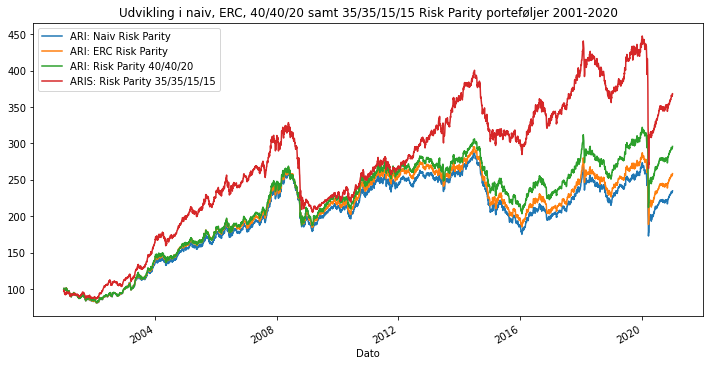

In [241]:
wi_sammenligning_naiv_erc_35351515.plot(figsize=(12,6), title='Udvikling i naiv, ERC, 40/40/20 samt 35/35/15/15 Risk Parity porteføljer 2001-2020')

### Plot af ARI Naiv, ERC, 40/40/20 og 35/35/15/15 RP + EWMA

In [242]:
# Her samles alle RP strategier i en DataFrame
sammenligning_naiv_erc_EWMA = pd.DataFrame({'ARI: Naiv Risk Parity': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], \
                             'ARI: ERC Risk Parity': afkast_rp_g_aoc['AOC: RP Gearet'], \
                             'ARI: 40/40/20: Risk Parity': afkast_rp_g_aoc_404020['AOC 40/40/20: RP Gearet'], \
                             'ARIS: 35/35/15/15: RP Gearet': afkast_rp_g_aocs_35351515['AOCS 35/35/15/15: RP Gearet'], \
                             'ARIS 35/35/15/15: RP Gearet - EWMA': afkast_rp_g_aocs_35351515_ewma['AOCS 35/35/15/15: RP Gearet - EWMA'] \
                             })
sammenligning_naiv_erc_EWMA = sammenligning_naiv_erc_EWMA['2001-01-03':'2020-12-31']

In [243]:
wi_sammenligning_naiv_erc_EWMA = 100*(1+sammenligning_naiv_erc_EWMA['2001-01-03':'2020-12-31']).cumprod()

<AxesSubplot:title={'center':'Udvikling i naiv, ERC, 40/40/20 samt 35/35/15/15 med og uden EWMA gearing Risk Parity porteføljer 2001-2020'}, xlabel='Dato'>

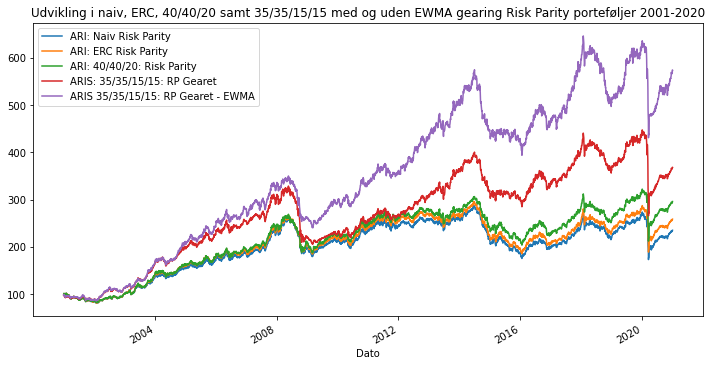

In [244]:
wi_sammenligning_naiv_erc_EWMA.plot(figsize=(12,6), title='Udvikling i naiv, ERC, 40/40/20 samt 35/35/15/15 med og uden EWMA gearing Risk Parity porteføljer 2001-2020')

In [245]:
# Her samles alle RP strategier i en DataFrame
sammenligning_rp_3 = pd.DataFrame({'ARI: Naiv Risk Parity': afkast_naiv_rp_g_aoc['AOC: Naiv RP Gearet'], \
                             'ARI: ERC Risk Parity': afkast_rp_g_aoc['AOC: RP Gearet'], \
                             'ARI: Risk Parity 40/40/20': afkast_rp_g_aoc_404020['AOC 40/40/20: RP Gearet'], \
                             'ARIS: Risk Parity 35/35/15/15': afkast_rp_g_aocs_35351515['AOCS 35/35/15/15: RP Gearet']})
sammenligning_rp_3 = sammenligning_rp_3['2001-01-03':'2020-12-31']

<AxesSubplot:xlabel='Dato'>

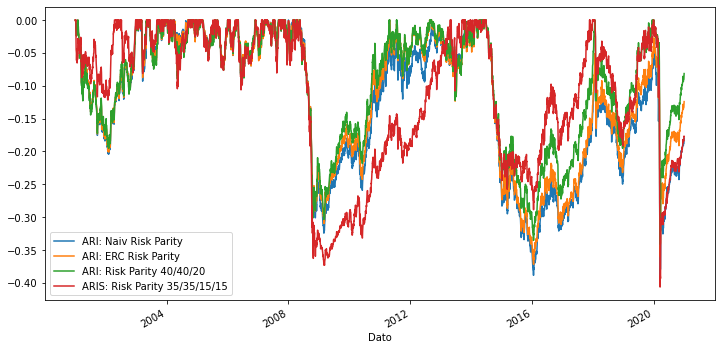

In [246]:
dd_rp3=dd(sammenligning_rp_3)
dd_rp3.plot(figsize=(12,6))